In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
file_dir = "../models/results/"

MPNN_01 = pd.read_csv(file_dir + "MPNN_01.csv")
MPNN_05 = pd.read_csv(file_dir + "MPNN_05.csv")
MPNN_1 = pd.read_csv(file_dir + "MPNN_1.csv")
MPNN_5 = pd.read_csv(file_dir + "MPNN_5.csv")

SAGE_01 = pd.read_csv(file_dir + "SAGE_01.csv")
SAGE_05 = pd.read_csv(file_dir + "SAGE_05.csv")
SAGE_1 = pd.read_csv(file_dir + "SAGE_1.csv")
SAGE_5 = pd.read_csv(file_dir + "SAGE_5.csv")

CONV_01 = pd.read_csv(file_dir + "CONV_01.csv")
CONV_05 = pd.read_csv(file_dir + "CONV_05.csv")
CONV_1 = pd.read_csv(file_dir + "CONV_1.csv")
CONV_5 = pd.read_csv(file_dir + "CONV_5.csv")

GAT_01 = pd.read_csv(file_dir + "GAT_01.csv")
GAT_05 = pd.read_csv(file_dir + "GAT_05.csv")
GAT_1 = pd.read_csv(file_dir + "GAT_1.csv")
GAT_5 = pd.read_csv(file_dir + "GAT_5.csv")

GIN_01 = pd.read_csv(file_dir + "GIN_01.csv")
GIN_05 = pd.read_csv(file_dir + "GIN_05.csv")
GIN_1 = pd.read_csv(file_dir + "GIN_1.csv")
GIN_5 = pd.read_csv(file_dir + "GIN_5.csv")

In [5]:
MPNN_01

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.012821
2,0.000000,0.391026
3,0.000091,0.391026
4,0.000091,0.416667
...,...,...
409,0.966496,1.000000
410,0.966679,1.000000
411,0.975717,1.000000
412,0.975899,1.000000


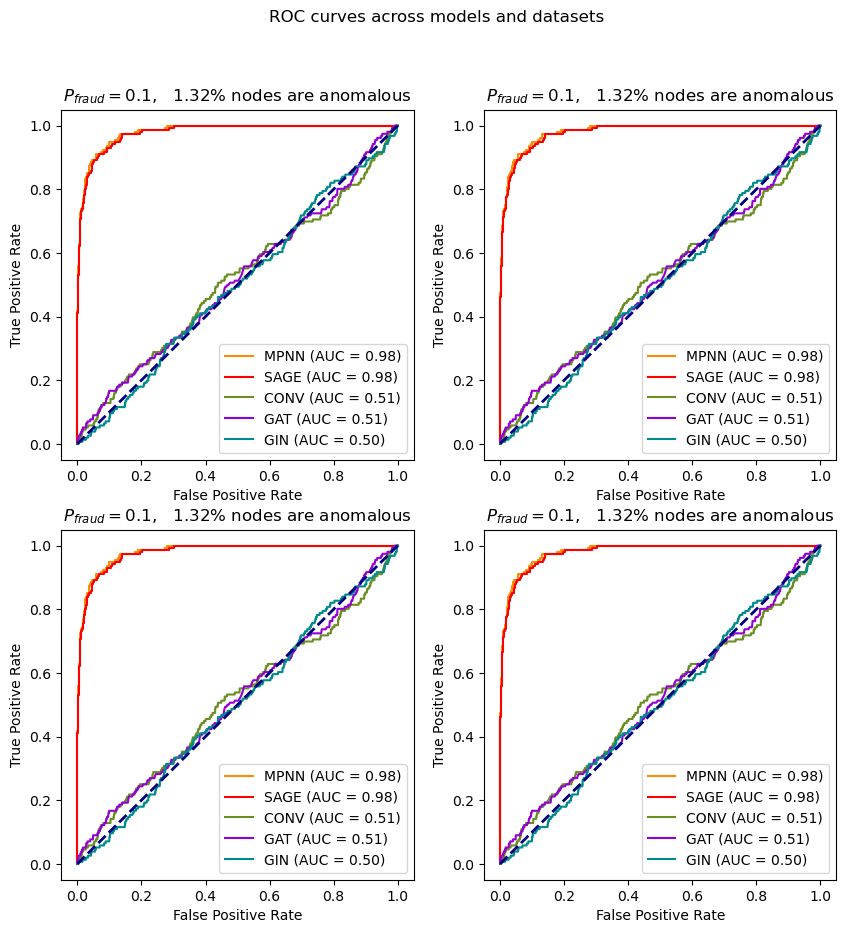

In [47]:
plt.figure(figsize=(10,10))
plt.suptitle('ROC curves across models and datasets')


ax1 = plt.subplot(2, 2, 1)
plt.plot(MPNN_5['fpr'], MPNN_5['tpr'], color='darkorange', lw=1.5, label='MPNN (AUC = %0.2f)' % auc(MPNN_5['fpr'], MPNN_5['tpr']))
plt.plot(SAGE_5['fpr'], SAGE_01['tpr'], color='red', lw=1.5, label='SAGE (AUC = %0.2f)' % auc(SAGE_01['fpr'], SAGE_01['tpr']))
plt.plot(CONV_5['fpr'], CONV_01['tpr'], color='olivedrab', lw=1.5, label='CONV (AUC = %0.2f)' % auc(CONV_01['fpr'], CONV_01['tpr']))
plt.plot(GAT_5['fpr'], GAT_01['tpr'], color='darkviolet', lw=1.5, label='GAT (AUC = %0.2f)' % auc(GAT_01['fpr'], GAT_01['tpr']))
plt.plot(GIN_5['fpr'], GIN_01['tpr'], color='darkcyan', lw=1.5, label='GIN (AUC = %0.2f)' % auc(GIN_01['fpr'], GIN_01['tpr']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('$P_{fraud}=0.1$,   1.32% nodes are anomalous')
plt.legend(loc="lower right")

ax1 = plt.subplot(2, 2, 2)
plt.plot(MPNN_01['fpr'], MPNN_01['tpr'], color='darkorange', lw=1.5, label='MPNN (AUC = %0.2f)' % auc(MPNN_01['fpr'], MPNN_01['tpr']))
plt.plot(SAGE_01['fpr'], SAGE_01['tpr'], color='red', lw=1.5, label='SAGE (AUC = %0.2f)' % auc(SAGE_01['fpr'], SAGE_01['tpr']))
plt.plot(CONV_01['fpr'], CONV_01['tpr'], color='olivedrab', lw=1.5, label='CONV (AUC = %0.2f)' % auc(CONV_01['fpr'], CONV_01['tpr']))
plt.plot(GAT_01['fpr'], GAT_01['tpr'], color='darkviolet', lw=1.5, label='GAT (AUC = %0.2f)' % auc(GAT_01['fpr'], GAT_01['tpr']))
plt.plot(GIN_01['fpr'], GIN_01['tpr'], color='darkcyan', lw=1.5, label='GIN (AUC = %0.2f)' % auc(GIN_01['fpr'], GIN_01['tpr']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('$P_{fraud}=0.1$,   1.32% nodes are anomalous')
plt.legend(loc="lower right")

ax1 = plt.subplot(2, 2, 3)
plt.plot(MPNN_01['fpr'], MPNN_01['tpr'], color='darkorange', lw=1.5, label='MPNN (AUC = %0.2f)' % auc(MPNN_01['fpr'], MPNN_01['tpr']))
plt.plot(SAGE_01['fpr'], SAGE_01['tpr'], color='red', lw=1.5, label='SAGE (AUC = %0.2f)' % auc(SAGE_01['fpr'], SAGE_01['tpr']))
plt.plot(CONV_01['fpr'], CONV_01['tpr'], color='olivedrab', lw=1.5, label='CONV (AUC = %0.2f)' % auc(CONV_01['fpr'], CONV_01['tpr']))
plt.plot(GAT_01['fpr'], GAT_01['tpr'], color='darkviolet', lw=1.5, label='GAT (AUC = %0.2f)' % auc(GAT_01['fpr'], GAT_01['tpr']))
plt.plot(GIN_01['fpr'], GIN_01['tpr'], color='darkcyan', lw=1.5, label='GIN (AUC = %0.2f)' % auc(GIN_01['fpr'], GIN_01['tpr']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('$P_{fraud}=0.1$,   1.32% nodes are anomalous')
plt.legend(loc="lower right")

ax1 = plt.subplot(2, 2, 4)
plt.plot(MPNN_01['fpr'], MPNN_01['tpr'], color='darkorange', lw=1.5, label='MPNN (AUC = %0.2f)' % auc(MPNN_01['fpr'], MPNN_01['tpr']))
plt.plot(SAGE_01['fpr'], SAGE_01['tpr'], color='red', lw=1.5, label='SAGE (AUC = %0.2f)' % auc(SAGE_01['fpr'], SAGE_01['tpr']))
plt.plot(CONV_01['fpr'], CONV_01['tpr'], color='olivedrab', lw=1.5, label='CONV (AUC = %0.2f)' % auc(CONV_01['fpr'], CONV_01['tpr']))
plt.plot(GAT_01['fpr'], GAT_01['tpr'], color='darkviolet', lw=1.5, label='GAT (AUC = %0.2f)' % auc(GAT_01['fpr'], GAT_01['tpr']))
plt.plot(GIN_01['fpr'], GIN_01['tpr'], color='darkcyan', lw=1.5, label='GIN (AUC = %0.2f)' % auc(GIN_01['fpr'], GIN_01['tpr']))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('$P_{fraud}=0.1$,   1.32% nodes are anomalous')
plt.legend(loc="lower right")

plt.show()

